In [1]:
import os
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import Sequential
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input,LSTM,GRU,Bidirectional,GlobalAveragePooling1D,Lambda,Concatenate,Dense
from keras import Sequential
from keras.models import Model
from keras.layers import Input,LSTM,GRU,Bidirectional,GlobalAveragePooling1D,Lambda,Concatenate,Dense
import keras.backend as k
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\users\theunlikelymonk\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\theunlikelymonk\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\theunlikelymonk\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

In [15]:
import keras.backend as K

In [8]:
def get_mnist(limit=None):
  df = pd.read_csv('mnist_dataset/train.csv')
  data = df.as_matrix()
  np.random.shuffle(data)
  X = data[:,1:].reshape(-1,28,28)/255.0
  Y = data[:,0]
  if limit is not None:
    X,Y = X[:limit],Y[:limit]
  return X,Y

In [9]:
X,Y = get_mnist()

c:\users\theunlikelymonk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# config 
D=28
M = 15

In [11]:
input_ = Input(shape=(D,D))

In [13]:
# up-down
rnn1 = Bidirectional(LSTM(M,return_sequences=True))
x1 = rnn1(input_)
x1 = GlobalAveragePooling1D()(x1)

In [16]:
# left-right
rnn2 = Bidirectional(LSTM(M,return_sequences=True))
# custom layer
permutor = Lambda(lambda t:K.permute_dimensions(t,pattern=(0,2,1)))
x2 = permutor(input_)
x2 = rnn2(x2)
x2 = GlobalAveragePooling1D()(x2)

In [17]:
# put them together
concatenator = Concatenate(axis=1)
x = concatenator([x1,x2])

In [18]:
# final dense layer
output = Dense(10,activation='softmax')(x)
model = Model(inputs=input_,outputs = output)

In [20]:
# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [21]:
# train 
print('Training the model...')
r = model.fit(X,Y,batch_size=32,epochs=10,validation_split=0.3)

Training the model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 38s 1ms/step - loss: 0.7303 - acc: 0.8036 - val_loss: 0.2909 - val_acc: 0.9185
Epoch 2/10
29399/29399 [==============================] - 38s 1ms/step - loss: 0.2185 - acc: 0.9369 - val_loss: 0.1938 - val_acc: 0.9446
Epoch 3/10
29399/29399 [==============================] - 43s 1ms/step - loss: 0.1578 - acc: 0.9529 - val_loss: 0.1539 - val_acc: 0.9530
Epoch 4/10
29399/29399 [==============================] - 47s 2ms/step - loss: 0.1289 - acc: 0.9613 - val_loss: 0.1271 - val_acc: 0.9621
Epoch 5/10
29399/29399 [==============================] - 49s 2ms/step - loss: 0.1076 - acc: 0.9671 - val_loss: 0.1209 - val_acc: 0.9627
Epoch 6/10
29399/29399 [==============================] - 48s 2ms/step - loss: 0.0945 - acc: 0.9710 - val_loss: 0.1190 - val_acc: 0.9646
Epoch 7/10


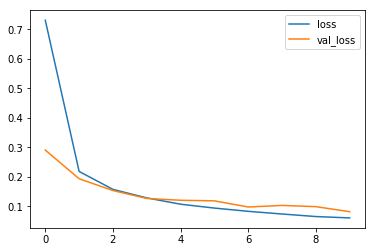

In [22]:
# Plot the loss
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

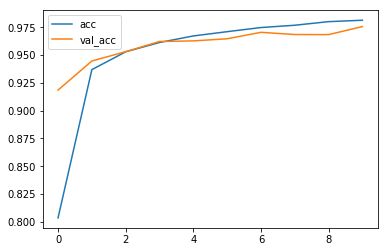

In [23]:
# Plot the loss
plt.plot(r.history['acc'],label='acc')
plt.plot(r.history['val_acc'],label='val_acc')
plt.legend()
plt.show()